In [73]:
import pandas as pd
import re
import nltk

In [74]:
train=pd.read_csv("./train.csv")
test=pd.read_csv("./test.csv")

In [75]:
id=test.id
print(id)

0       20800
1       20801
2       20802
3       20803
4       20804
        ...  
5195    25995
5196    25996
5197    25997
5198    25998
5199    25999
Name: id, Length: 5200, dtype: int64


In [76]:
from sklearn.feature_extraction.text import CountVectorizer

In [77]:
train["title"]

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2                        Why the Truth Might Get You Fired
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799                            What Keeps the F-35 Alive
Name: title, Length: 20800, dtype: object

In [78]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [79]:
train['title'].fillna("fake", inplace = True) 

In [80]:

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(train)):
    review = re.sub('[^a-zA-Z]', ' ', train['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [81]:
test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [82]:
test['title'].fillna("fake",inplace=True)

In [83]:
corpus[2]


'truth might get fire'

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [85]:
X.shape

(20800, 5000)

In [86]:
y=train['label']

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [88]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [89]:
import matplotlib.pyplot as plt

In [90]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [91]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [92]:

from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.902
Confusion matrix, without normalization


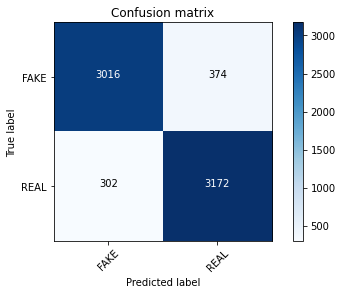

In [93]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [94]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9015151515151515

In [95]:
test['title'].fillna("fake",inplace=True)

In [96]:

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(test)):
    review = re.sub('[^a-zA-Z]', ' ', test['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [97]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
test= cv.fit_transform(corpus).toarray()

In [98]:
prediction=classifier.predict(test)

In [99]:
prediction[0]

1

In [103]:
submit = pd.DataFrame({'Id':id,'label':prediction})
submit.to_csv('submit1.csv', index = False)